# MVC project: exploration

- This notebook explores data generated by matlab

## Dimensions description
- `mat_files` contains the `MVE` variable with three dimensions: $\text{participant}(n) \times \text{muscle}(12) \times \text{test}(15)$

In [11]:
import os
import scipy.io as sio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
%matplotlib inline

In [2]:
# load data
data_path = '/media/romain/E/Projet_MVC/data/Final_output'
mat = {}
for ifile in os.listdir(data_path):
    if ifile.endswith('.mat'):
        name = ifile.split('MVE_Data_')[1].split('.mat')[0]
        mat[name] = {}
        mat[name]['path'] = os.path.join(data_path, ifile)
        mat[name]['data'] = sio.loadmat(mat[name]['path'])
        print("project '{}' loaded ({} participants)".format(name, mat[name]['data']['MVE'].shape[0]))

project 'Sylvain_2015' loaded (10 participants)
project 'Landry_2013' loaded (21 participants)
project 'Landry_2012' loaded (18 participants)
project 'Landry_2015_2' loaded (11 participants)
project 'Yoann_2015' loaded (22 participants)
project 'Landry_2015_1' loaded (14 participants)
project 'Patrick_2013' loaded (16 participants)


In [3]:
# 3d matrix to lists
participants = []
datasets = []
muscles = []
tests = []
relative_mvc = []

for idataset in list(mat.keys()):
    for iparticipant in range(mat[idataset]['data']['MVE'].shape[0]):
        for imuscle in range(mat[idataset]['data']['MVE'].shape[1]):
            max_mvc = mat[idataset]['data']['MVE'][iparticipant, imuscle, :].max()
            for itest in range(mat[idataset]['data']['MVE'].shape[2]):
                participants.append(iparticipant+1)
                datasets.append(idataset)
                muscles.append(imuscle+1)
                tests.append(itest+1)
                
                absolute_mvc = mat[idataset]['data']['MVE'][iparticipant, imuscle, itest]
                relative_mvc.append(absolute_mvc*100/max_mvc)
                

In [4]:
# lists to single dataframe
df = pd.DataFrame({
    'participant': participants,
    'dataset': datasets,
    'muscle': muscles,
    'test': tests,
    'relative_mvc': relative_mvc
})
df.head()

,dataset,muscle,participant,relative_mvc,test
0,Sylvain_2015,1,1,100.000000,1
1,Sylvain_2015,1,1,69.322225,2
2,Sylvain_2015,1,1,84.917656,3
3,Sylvain_2015,1,1,80.983069,4
4,Sylvain_2015,1,1,65.163384,5


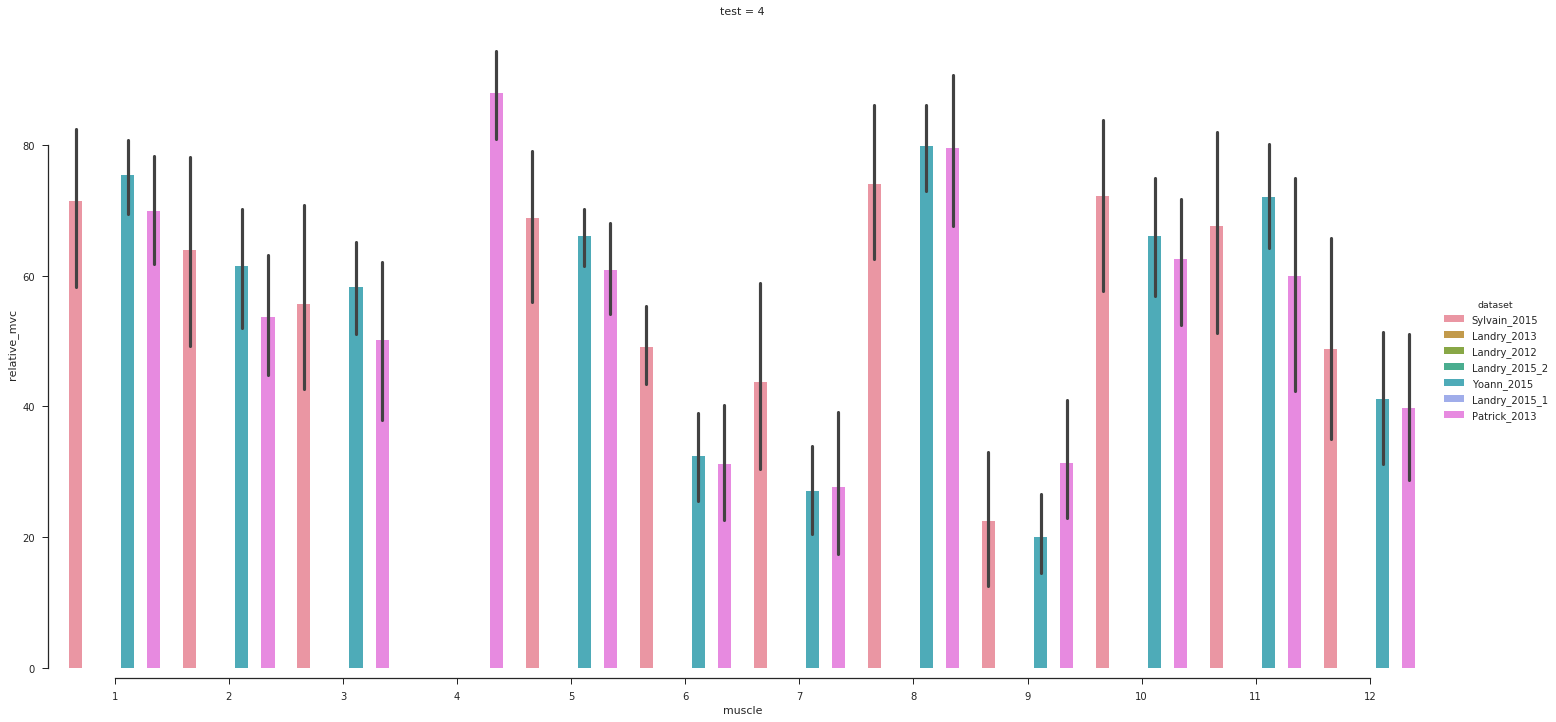

In [49]:
plt.figure(figsize=(45, 10))
#sns.boxplot(x='muscle', y='relative_mvc', hue='dataset', data=df, palette="PRGn")
sns.factorplot(x='muscle', y='relative_mvc',
               hue='dataset', row='test',
               data=df[df.test == 4], kind='bar',
               size=10, aspect=2)
sns.despine(offset=10, trim=True)

In [60]:
set(df[df.test == 1]['dataset'])

{'Landry_2012',
 'Landry_2013',
 'Landry_2015_1',
 'Landry_2015_2',
 'Patrick_2013',
 'Sylvain_2015',
 'Yoann_2015'}

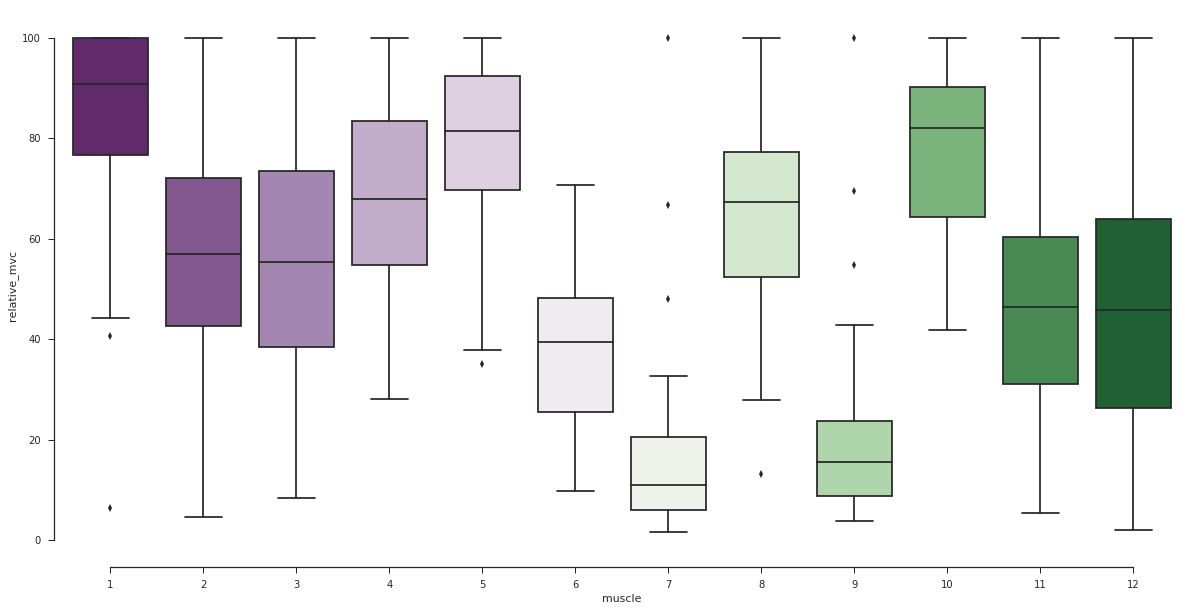

In [61]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="muscle", y="relative_mvc", data=df[df.test==1], palette="PRGn")
sns.despine(offset=10, trim=True)

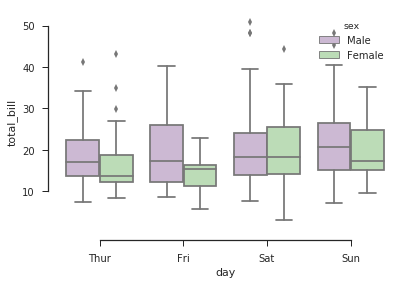

In [5]:
# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)